数据集大小： 200


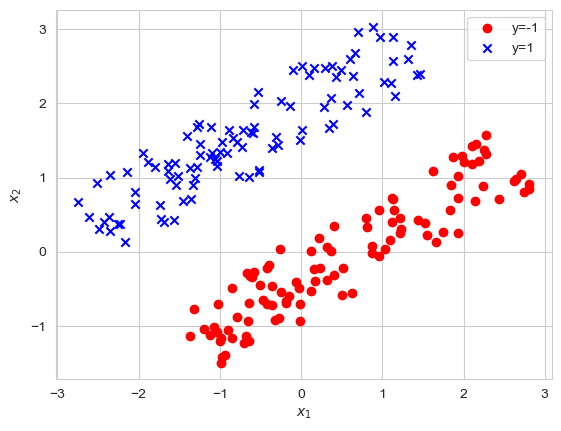

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm, trange

data = np.loadtxt('linear.csv', delimiter=',')
print('数据集大小：', len(data))
x = data[:, :2]
y = data[:, 2]

# 数据集可视化
plt.figure()
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', marker='x', label='y=1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

array([[-0.5068, -0.4434],
       [-0.3571,  1.4028],
       [ 0.8066,  0.3353],
       [ 1.4384,  0.4254],
       [-2.43  ,  0.4065],
       [ 2.6201,  0.9566],
       [-1.1157, -1.1303],
       [-1.6392,  1.1892],
       [-1.887 ,  1.2136],
       [-0.0284, -0.495 ],
       [ 1.9261,  0.2471],
       [ 2.4307,  0.7158],
       [-0.5853,  1.601 ],
       [-1.2468,  1.4567],
       [-0.014 , -0.7057],
       [-0.6345,  1.0125],
       [-0.9975, -1.21  ],
       [ 2.8061,  0.8494],
       [-1.2788,  1.1423],
       [-0.6413, -0.6878],
       [ 1.6253,  1.0841],
       [ 1.662 ,  0.1236],
       [-1.7944,  1.1434],
       [ 0.5623,  1.9783],
       [-0.5165,  1.0979],
       [ 0.1192,  0.007 ],
       [ 0.3633,  0.0033],
       [-0.9686, -1.4165],
       [-1.3274,  0.9049],
       [-0.9833, -1.4962],
       [-0.8503, -0.4913],
       [-1.7408,  0.6235],
       [-1.1166,  1.2775],
       [-1.026 , -0.708 ],
       [ 1.1248,  0.7293],
       [ 1.9324,  0.7283],
       [-0.3068,  1.5517],
 

In [15]:
def SMO(x, y, ker, C, max_iter):
    '''
    SMO算法
    x，y：样本的值和类别
    ker：核函数，与线性回归中核函数的含义相同
    C：惩罚系数
    max_iter：最大迭代次数
    '''
    # 初始化参数
    m = x.shape[0]
    alpha = np.zeros(m)
    b = 0

    # 预先计算所有向量的两两内积，减少重复计算
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = ker(x[i], x[j])

    for l in trange(max_iter):
        # 开始迭代
        for i in range(m):
            # 有m个参数，每一轮迭代中依次更新
            # 固定参数alpha_i与另一个随机参数alpha_j，并且保证i与j不相等
            j = np.random.choice([l for l in range(m) if l != i])

            # 用-q/2p更新alpha_i的值
            eta = K[j, j] + K[i, i] - 2 * K[i, j] # 分母
            e_i = np.sum(y * alpha * K[:, i]) + b - y[i] # 分子
            e_j = np.sum(y * alpha * K[:, j]) + b - y[j]
            alpha_i = alpha[i] + y[i] * (e_j - e_i) / (eta + 1e-5) # 防止除以0
            zeta = alpha[i] * y[i] + alpha[j] * y[j]

            # 将alpha_i和对应的alpha_j保持在[0,C]区间
            # 0 <= (zeta - y_j * alpha_j) / y_i <= C
            if y[i] == y[j]:
                lower = max(0, zeta / y[i] - C)
                upper = min(C, zeta / y[i])
            else:
                lower = max(0, zeta / y[i])
                upper = min(C, zeta / y[i] + C)
            alpha_i = np.clip(alpha_i, lower, upper)
            alpha_j = (zeta - y[i] * alpha_i) / y[j]

            # 更新b
            b_i = b - e_i - y[i] * (alpha_i - alpha[i]) * K[i, i] - y[j] * (alpha_j - alpha[j]) * K[i, j]
            b_j = b - e_j - y[j] * (alpha_j - alpha[j]) * K[j, j] - y[i] * (alpha_i - alpha[i]) * K[i, j]
            if 0 < alpha_i < C:
                b = b_i
            elif 0 < alpha_j < C:
                b = b_j
            else:
                b = (b_i + b_j) / 2

            # 更新参数
            alpha[i], alpha[j] = alpha_i, alpha_j

    return alpha, b

In [16]:
# 设置超参数
C = 1e8 # 由于数据集完全线性可分，我们不引入松弛变量
max_iter = 1000
np.random.seed(0)

alpha, b = SMO(x, y, ker=np.inner, C=C, max_iter=max_iter)

100%|██████████| 1000/1000 [00:06<00:00, 157.07it/s]


In [18]:
alpha,b

(array([-0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  1.02920281,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.25401916,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        , -0.        , -0.        ,  0. 

支持向量个数： 6
参数： [-1.0211867   1.66445549] -1.3343767573871523


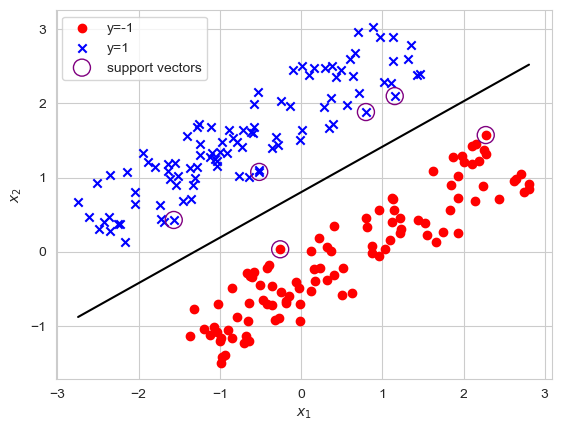

In [17]:
# 用alpha计算w，b和支持向量
sup_idx = alpha > 1e-5 # 支持向量的系数不为零
print('支持向量个数：', np.sum(sup_idx))
w = np.sum((alpha[sup_idx] * y[sup_idx]).reshape(-1, 1) * x[sup_idx], axis=0)
print('参数：', w, b)

# 绘图
X = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
Y = -(w[0] * X + b) / (w[1] + 1e-5)
plt.figure()
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
plt.plot(X, Y, color='black')
# 用圆圈标记出支持向量
plt.scatter(x[sup_idx, 0], x[sup_idx, 1], marker='o', color='none',
    edgecolor='purple', s=150, label='support vectors')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

数据集大小： 194


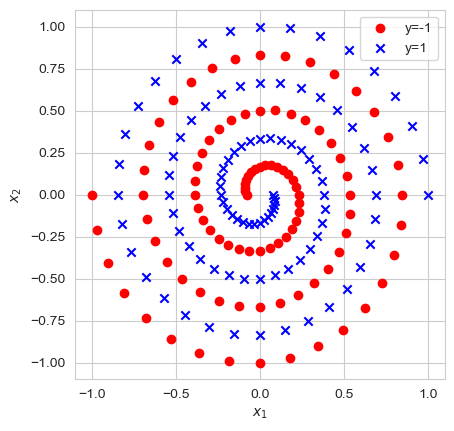

In [6]:
data = np.loadtxt('spiral.csv', delimiter=',')
print('数据集大小：', len(data))
x = data[:, :2]
y = data[:, 2]

# 数据集可视化
plt.figure()
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.axis('square')
plt.show()

In [7]:
# 简单多项式核
def simple_poly_kernel(d):
    def k(x, y):
        return np.inner(x, y) ** d
    return k

# RBF核
def rbf_kernel(sigma):
    def k(x, y):
        return np.exp(-np.inner(x - y, x - y) / (2.0 * sigma ** 2))
    return k

# 余弦相似度核
def cos_kernel(x, y):
    return np.inner(x, y) / np.linalg.norm(x, 2) / np.linalg.norm(y, 2)

# sigmoid核
def sigmoid_kernel(beta, c):
    def k(x, y):
        return np.tanh(beta * np.inner(x, y) + c)
    return k

核函数： Poly(3)


100%|██████████| 500/500 [00:02<00:00, 167.41it/s]


核函数： RBF(0.1)


100%|██████████| 500/500 [00:02<00:00, 170.59it/s]


核函数： Cos


100%|██████████| 500/500 [00:03<00:00, 156.35it/s]


核函数： Sigmoid(1,-1)


100%|██████████| 500/500 [00:02<00:00, 170.43it/s]


<Figure size 640x480 with 0 Axes>

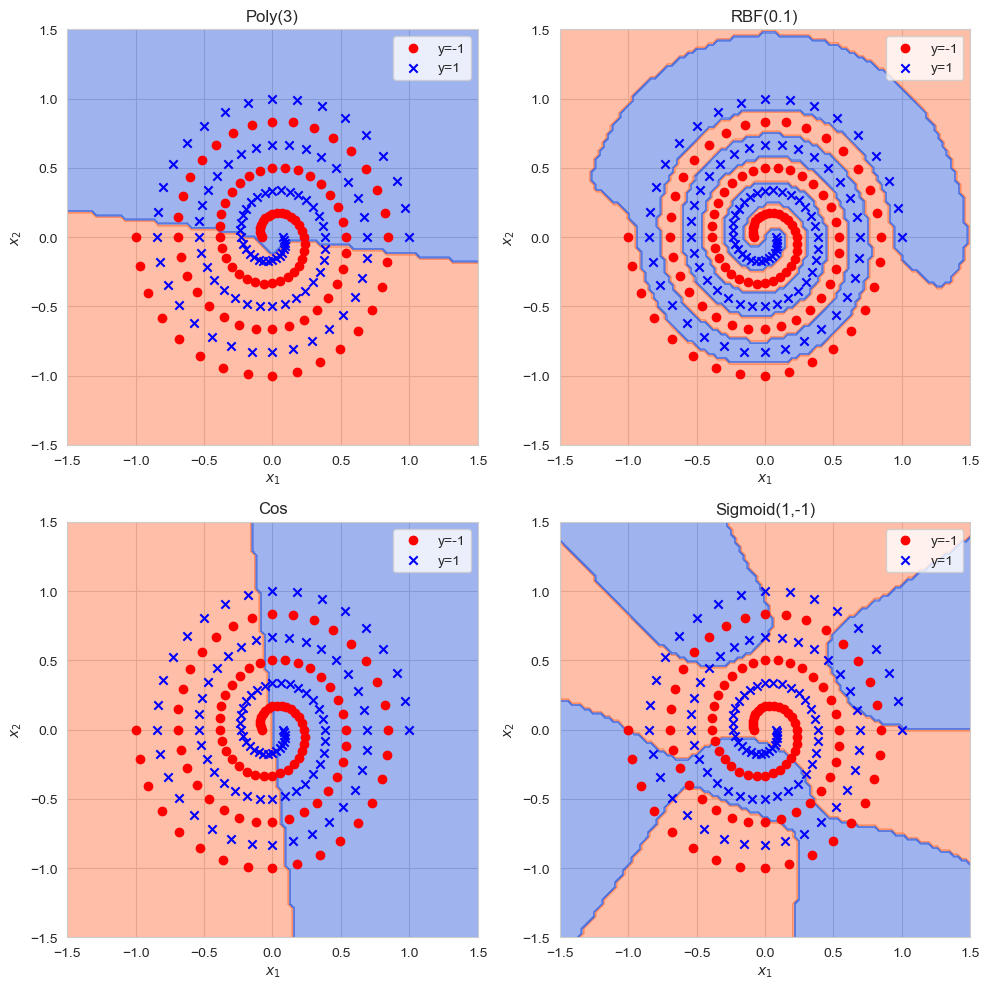

In [8]:
kernels = [
    simple_poly_kernel(3),
    rbf_kernel(0.1),
    cos_kernel,
    sigmoid_kernel(1, -1)
]
ker_names = ['Poly(3)', 'RBF(0.1)', 'Cos', 'Sigmoid(1,-1)']
C = 100
max_iter = 500

# 绘图准备，构造网格
np.random.seed(0)
plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
cmap = ListedColormap(['coral', 'royalblue'])

# 开始求解 SVM
for i in range(len(kernels)):
    print('核函数：', ker_names[i])
    alpha, b = SMO(x, y, kernels[i], C=C, max_iter=max_iter)
    sup_idx = alpha > 1e-6 # 支持向量的系数不为零
    sup_x = x[sup_idx] # 支持向量
    sup_y = y[sup_idx]
    sup_alpha = alpha[sup_idx]

    # 用支持向量计算 w^T*x
    def wx(x_new):
        s = 0
        for xi, yi, ai in zip(sup_x, sup_y, sup_alpha):
            s += yi * ai * kernels[i](xi, x_new)
        return s

    # 构造网格并用 SVM 预测分类
    G = np.linspace(-1.5, 1.5, 100)
    G = np.meshgrid(G, G)
    X = np.array([G[0].flatten(), G[1].flatten()]).T # 转换为每行一个向量的形式
    Y = np.array([wx(xi) + b for xi in X])
    Y[Y < 0] = -1
    Y[Y >= 0] = 1
    Y = Y.reshape(G[0].shape)
    axs[i].contourf(G[0], G[1], Y, cmap=cmap, alpha=0.5)
    # 绘制原数据集的点
    axs[i].scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
    axs[i].scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
    axs[i].set_title(ker_names[i])
    axs[i].set_xlabel(r'$x_1$')
    axs[i].set_ylabel(r'$x_2$')
    axs[i].legend()

plt.tight_layout()
plt.savefig('output_24_2.png')
plt.savefig('output_24_2.pdf')
plt.show()

核函数： Poly(3)


100%|██████████| 500/500 [00:03<00:00, 165.82it/s]


核函数： RBF(0.1)


100%|██████████| 500/500 [00:02<00:00, 170.62it/s]


核函数： Cos


100%|██████████| 500/500 [00:02<00:00, 170.14it/s]


核函数： Sigmoid(1,-1)


100%|██████████| 500/500 [00:02<00:00, 169.67it/s]


<Figure size 640x480 with 0 Axes>

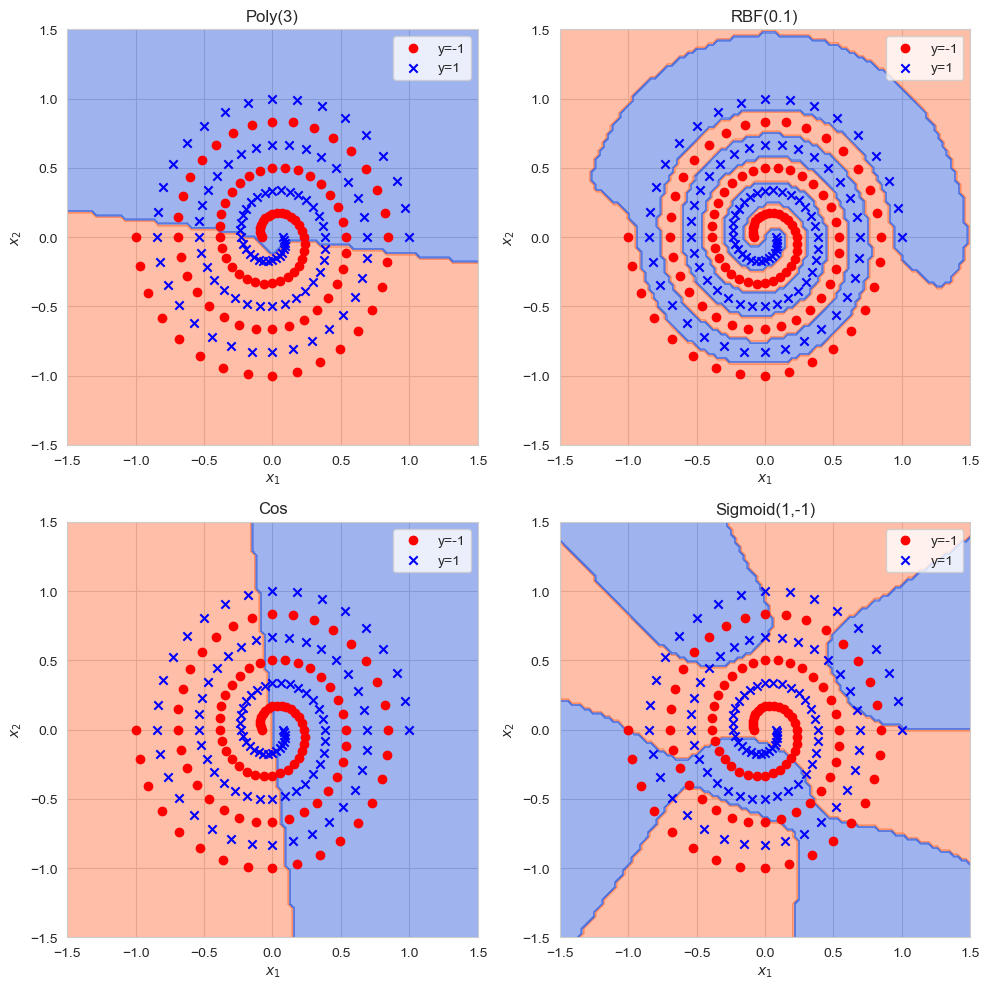

In [9]:
kernels = [
    simple_poly_kernel(3),
    rbf_kernel(0.1),
    cos_kernel,
    sigmoid_kernel(1, -1)
]
ker_names = ['Poly(3)', 'RBF(0.1)', 'Cos', 'Sigmoid(1,-1)']
C = 100
max_iter = 500

# 绘图准备，构造网格
np.random.seed(0)
plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
cmap = ListedColormap(['coral', 'royalblue'])

# 开始求解 SVM
for i in range(len(kernels)):
    print('核函数：', ker_names[i])
    alpha, b = SMO(x, y, kernels[i], C=C, max_iter=max_iter)
    sup_idx = alpha > 1e-6 # 支持向量的系数不为零
    sup_x = x[sup_idx] # 支持向量
    sup_y = y[sup_idx]
    sup_alpha = alpha[sup_idx]

    # 用支持向量计算 w^T*x
    def wx(x_new):
        s = 0
        for xi, yi, ai in zip(sup_x, sup_y, sup_alpha):
            s += yi * ai * kernels[i](xi, x_new)
        return s

    # 构造网格并用 SVM 预测分类
    G = np.linspace(-1.5, 1.5, 100)
    G = np.meshgrid(G, G)
    X = np.array([G[0].flatten(), G[1].flatten()]).T # 转换为每行一个向量的形式
    Y = np.array([wx(xi) + b for xi in X])
    Y[Y < 0] = -1
    Y[Y >= 0] = 1
    Y = Y.reshape(G[0].shape)
    axs[i].contourf(G[0], G[1], Y, cmap=cmap, alpha=0.5)
    # 绘制原数据集的点
    axs[i].scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
    axs[i].scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
    axs[i].set_title(ker_names[i])
    axs[i].set_xlabel(r'$x_1$')
    axs[i].set_ylabel(r'$x_2$')
    axs[i].legend()

plt.tight_layout()
plt.savefig('output_24_2.png')
plt.savefig('output_24_2.pdf')
plt.show()